In [2]:
import requests
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from time import sleep
from random import randint

In [3]:
def get_count():
    url = "https://www.worldometers.info/coronavirus/"

    r = requests.get(url)
    html = r.text

    soup = BeautifulSoup(html)
    table = soup.find('table', {"class": "table table-bordered table-hover main_table_countries"})
    rows = table.find_all('tr')
    data = []

    for row in rows[1:]:
      cols = row.find_all('td')
      cols = [ele.text.strip() for ele in cols]
      data.append([ele for ele in cols if ele])

    # result = pd.DataFrame(data, columns = ['CountryOther',    'TotalCases',    'NewCases',    'TotalDeaths',    'NewDeaths',    'TotalRecovered',    'ActiveCases',    'Serious/Critical',    'TotCases/1Mpop',    'Deaths/1Mpop'])

    # Step 3: Analyze the HTML tag, where your content lives

    # Find the country list table in the webpage, using find returns the first occurence 
    my_table = soup.find('table',{'id':'main_table_countries_today'})

    # Find all table rows in the first table (i.e. the table of interest)
    table_rows = my_table.find_all('tr')

    # Since the country names are the first button in each row, find all buttons from the 
    # 1st row and return their text. 
    # we use 'td' because td is the closing html tag
    countries = [row.find('td') for row in table_rows]

    # print(countries)

    pd.options.display.max_rows
    pd.options.display.max_rows = 999
    df = pd.DataFrame()
    df['Country'] = countries
    df

    cases=[]
    for row in table_rows:
        cols=row.find_all('td')
        cols=[x.text.strip() for x in cols]
        cases.append(cols)

    # Getting attribute name 
    # find the tables 
    attribute_tag = my_table.find_all('th')
    attribute=[]
    for i in attribute_tag:
        attribute.append(i.text)

    df=pd.DataFrame(cases,columns=attribute)

    df_new=df[1:-1]

    result = df_new.fillna("Nan")

    return result


In [4]:
df_test = get_count()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 1 to 246
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    246 non-null    object
 1   Country,Other        246 non-null    object
 2   TotalCases           246 non-null    object
 3   NewCases             246 non-null    object
 4   TotalDeaths          246 non-null    object
 5   NewDeaths            246 non-null    object
 6   TotalRecovered       246 non-null    object
 7   NewRecovered         246 non-null    object
 8   ActiveCases          246 non-null    object
 9   Serious,Critical     246 non-null    object
 10  Tot Cases/1M pop     246 non-null    object
 11  Deaths/1M pop        246 non-null    object
 12  TotalTests           246 non-null    object
 13  Tests/
1M pop
       246 non-null    object
 14  Population           246 non-null    object
 15  Continent            246 non-null    object
 16  1 Caseev

In [5]:
df_test.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",...,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,,North America,"123,329,027",,"1,596,552",,"118,266,265",,"3,466,210","8,730",...,,,,North America,,,,,,
2,,Asia,"212,704,837","+110,256","1,528,942",+335,"197,202,442","+91,062","13,973,453","16,001",...,,,,Asia,,,,,,
3,,Europe,"244,740,090","+9,015","2,005,306",+82,"240,414,159","+46,425","2,320,625","6,542",...,,,,Europe,,,,,,
4,,South America,"67,686,626",,"1,347,141",,"65,810,786",+854,"528,699","10,233",...,,,,South America,,,,,,
5,,Oceania,"13,888,348",+25,"25,232",,"13,718,857",+48,"144,259",77,...,,,,Australia/Oceania,,,,,,
6,,Africa,"12,773,223",,"258,499",,"12,058,924",,"455,800",547,...,,,,Africa,,,,,,
7,,,721,,15,,706,,0,0,...,,,,,,,,,,
8,,World,"675,122,872","+119,296","6,761,687",+417,"647,472,139","+138,144","20,889,046","42,130",...,,,,All,,,,,,
9,1,USA,"104,183,562",,"1,132,719",,"101,290,878",,"1,759,965","3,564",...,"1,159,772,464","3,464,021","334,805,269",North America,3,296,0,,,"5,257"
10,2,India,"44,682,784",,"530,740",,"44,150,289",,"1,755",698,...,"915,265,788","650,679","1,406,631,776",Asia,31,"2,650",2,,,1


In [6]:
##we want to see all the columns without the eclipses

pd.set_option("display.max.columns", None)

In [7]:
df_test.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,,North America,"123,329,027",,"1,596,552",,"118,266,265",,"3,466,210","8,730",,,,,,North America,,,,,,
2,,Asia,"212,704,837","+110,256","1,528,942",+335,"197,202,442","+91,062","13,973,453","16,001",,,,,,Asia,,,,,,
3,,Europe,"244,740,090","+9,015","2,005,306",+82,"240,414,159","+46,425","2,320,625","6,542",,,,,,Europe,,,,,,
4,,South America,"67,686,626",,"1,347,141",,"65,810,786",+854,"528,699","10,233",,,,,,South America,,,,,,
5,,Oceania,"13,888,348",+25,"25,232",,"13,718,857",+48,"144,259",77,,,,,,Australia/Oceania,,,,,,


In [8]:
##since empty cells are null values, we replace them with NaN

df_test = df_test.replace('', np.nan)
df_test = df_test.replace('N/A', np.nan)

In [9]:
df_test.head(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,NaN,North America,"123,329,027",NaN,"1,596,552",NaN,"118,266,265",NaN,"3,466,210","8,730",NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Asia,"212,704,837","+110,256","1,528,942",+335,"197,202,442","+91,062","13,973,453","16,001",NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Europe,"244,740,090","+9,015","2,005,306",+82,"240,414,159","+46,425","2,320,625","6,542",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,South America,"67,686,626",NaN,"1,347,141",NaN,"65,810,786",+854,"528,699","10,233",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Oceania,"13,888,348",+25,"25,232",NaN,"13,718,857",+48,"144,259",77,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Africa,"12,773,223",NaN,"258,499",NaN,"12,058,924",NaN,"455,800",547,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,World,"675,122,872","+119,296","6,761,687",+417,"647,472,139","+138,144","20,889,046","42,130","86,612",867.5,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN,NaN,NaN
9,1,USA,"104,183,562",NaN,"1,132,719",NaN,"101,290,878",NaN,"1,759,965","3,564","311,177","3,383","1,159,772,464","3,464,021","334,805,269",North America,3,296,0,NaN,NaN,"5,257"
10,2,India,"44,682,784",NaN,"530,740",NaN,"44,150,289",NaN,"1,755",698,"31,766",377,"915,265,788","650,679","1,406,631,776",Asia,31,"2,650",2,NaN,NaN,1


In [10]:
df_test.isnull()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
1,True,False,False,True,False,True,False,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True
2,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
3,True,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
4,True,False,False,True,False,True,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
5,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True
6,True,False,False,True,False,True,False,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True
7,True,True,False,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True
8,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True
9,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False
10,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [11]:
##we install some dependencies to help us explore our dataset

!pip install requests pandas matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


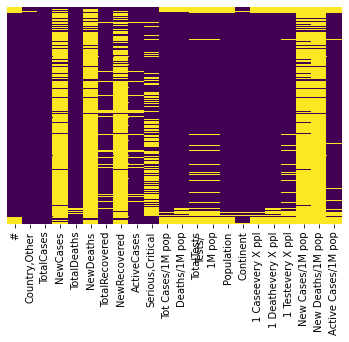

In [12]:
##visualize the extent of null values in the dataset

sns.heatmap(df_test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
##I checked for the percentage of null values in the columns

df_test.isnull().mean() * 100

#                       6.097561
Country,Other           0.406504
TotalCases              0.000000
NewCases               84.552846
TotalDeaths             2.439024
NewDeaths              90.650407
TotalRecovered          8.536585
NewRecovered           82.520325
ActiveCases             7.723577
Serious,Critical       39.430894
Tot Cases/1M pop        6.504065
Deaths/1M pop           8.943089
TotalTests             13.414634
Tests/\n1M pop\n       13.414634
Population              6.910569
Continent               1.626016
1 Caseevery X ppl       6.910569
1 Deathevery X ppl      9.349593
1 Testevery X ppl      13.414634
New Cases/1M pop       87.398374
New Deaths/1M pop      92.682927
Active Cases/1M pop     9.756098
dtype: float64

### #NewCases has 82.926%, NewDeaths has 89.024%, NewRecovered has 80.489%, New Cases/1M pop has 87.398% and New Deaths/1M pop has 92.682% null values. These are way higher than the acceptable 50% threshold, hence, these columns have to be dropped.

In [14]:
##let's drop all the columns with more than 50% null values

df_test = df_test.drop(['NewCases', 'NewDeaths', 'NewRecovered', 'New Cases/1M pop', 'New Deaths/1M pop'], axis=1)
df_test.head(10)

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
1,NaN,North America,"123,329,027","1,596,552","118,266,265","3,466,210","8,730",NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN
2,NaN,Asia,"212,704,837","1,528,942","197,202,442","13,973,453","16,001",NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN
3,NaN,Europe,"244,740,090","2,005,306","240,414,159","2,320,625","6,542",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN
4,NaN,South America,"67,686,626","1,347,141","65,810,786","528,699","10,233",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN
5,NaN,Oceania,"13,888,348","25,232","13,718,857","144,259",77,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN
6,NaN,Africa,"12,773,223","258,499","12,058,924","455,800",547,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN
7,NaN,NaN,721,15,706,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,World,"675,122,872","6,761,687","647,472,139","20,889,046","42,130","86,612",867.5,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN
9,1,USA,"104,183,562","1,132,719","101,290,878","1,759,965","3,564","311,177","3,383","1,159,772,464","3,464,021","334,805,269",North America,3,296,0,"5,257"
10,2,India,"44,682,784","530,740","44,150,289","1,755",698,"31,766",377,"915,265,788","650,679","1,406,631,776",Asia,31,"2,650",2,1


In [15]:
df_test.head(20)

,#,"Country,Other",TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,Active Cases/1M pop
1,NaN,North America,"123,329,027","1,596,552","118,266,265","3,466,210","8,730",NaN,NaN,NaN,NaN,NaN,North America,NaN,NaN,NaN,NaN
2,NaN,Asia,"212,704,837","1,528,942","197,202,442","13,973,453","16,001",NaN,NaN,NaN,NaN,NaN,Asia,NaN,NaN,NaN,NaN
3,NaN,Europe,"244,740,090","2,005,306","240,414,159","2,320,625","6,542",NaN,NaN,NaN,NaN,NaN,Europe,NaN,NaN,NaN,NaN
4,NaN,South America,"67,686,626","1,347,141","65,810,786","528,699","10,233",NaN,NaN,NaN,NaN,NaN,South America,NaN,NaN,NaN,NaN
5,NaN,Oceania,"13,888,348","25,232","13,718,857","144,259",77,NaN,NaN,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN
6,NaN,Africa,"12,773,223","258,499","12,058,924","455,800",547,NaN,NaN,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN
7,NaN,NaN,721,15,706,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,World,"675,122,872","6,761,687","647,472,139","20,889,046","42,130","86,612",867.5,NaN,NaN,NaN,All,NaN,NaN,NaN,NaN
9,1,USA,"104,183,562","1,132,719","101,290,878","1,759,965","3,564","311,177","3,383","1,159,772,464","3,464,021","334,805,269",North America,3,296,0,"5,257"
10,2,India,"44,682,784","530,740","44,150,289","1,755",698,"31,766",377,"915,265,788","650,679","1,406,631,776",Asia,31,"2,650",2,1


In [17]:
for row in df_test['TotalRecovered']:
  if row == 'NaN': TotalRecovered.append('0')
  else:    
  

SyntaxError: ignored